In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [174]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=3,
    n_repeated=1,
    flip_y=0.05,
    class_sep=1,
    random_state=1
)

In [175]:
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier

In [176]:
clf = RandomForestClassifier(random_state=1, max_depth=4, criterion='entropy')

In [177]:
clf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1)

In [178]:
score = clf.score(X, y)
print(score)

0.94


In [179]:
def plot_probability_distributions(clf, X, y):
    prob = clf.predict_proba(X)
    plt.hist([p for p, y in zip(prob[:,0], y) if y == 0], bins=np.linspace(0, 1, 25), alpha=0.6, color='r')
    plt.hist([p for p, y in zip(prob[:,0], y) if y == 1], bins=np.linspace(0, 1, 25), alpha=0.6, color='b')

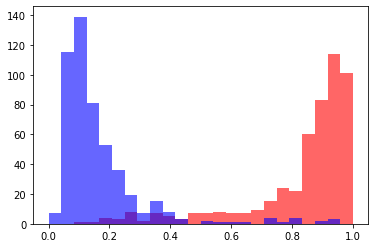

In [180]:
plot_probability_distributions(clf, X, y)

### Learning Curve

In [181]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X,
    y,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

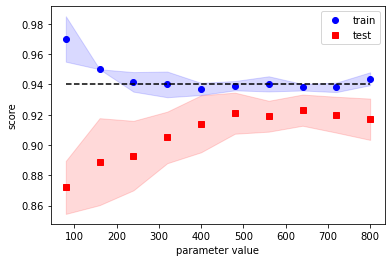

In [182]:
plot_learning_curve(train_scores, test_scores, train_sizes, expected_score=score, stat_error=False)

### Validation Curve

In [19]:
from my_lib.plotting import plot_probability_distributions, plot_learning_curve, plot_validation_curve

In [23]:
param_range = range(2, 20)
train_scores, test_scores = validation_curve(
    estimator=clf, 
    X=X, 
    y=y, 
    param_name='max_depth', 
    param_range=param_range,
    cv=10
)

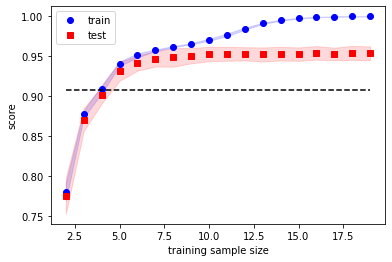

In [24]:
plot_validation_curve(train_scores, test_scores, param_range, expected_score=score, stat_error=False)